In [1]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go

In [2]:
import xarray as xr

In [89]:
import networkx as nx
import numpy as np
import pyvis

In [4]:
%matplotlib inline

In [5]:
df = pd.read_csv("results/costs.csv", names=["system","from_spec", "to_spec", "cost"]
                ).set_index(["system","from_spec", "to_spec"])
data = df[["cost"]].to_xarray()

In [202]:
df

cost
system  from_spec  to_spec           
altair  box        box_day          4
                   box_day_time     6
                   box_time         4
                   box_time_day     6
                   strip           40
...                               ...
seaborn strip_time box_day_time     5
                   box_time         1
                   box_time_day     6
                   strip            1
                   strip_day        1

[224 rows x 1 columns]

In [6]:
data

<xarray.Dataset>
Dimensions:    (system: 4, from_spec: 8, to_spec: 8)
Coordinates:
  * system     (system) object 'altair' 'ggplot' 'px' 'seaborn'
  * from_spec  (from_spec) object 'box' 'box_day' ... 'strip_day' 'strip_time'
  * to_spec    (to_spec) object 'box' 'box_day' ... 'strip_day' 'strip_time'
Data variables:
    cost       (system, from_spec, to_spec) float64 nan 4.0 6.0 ... 1.0 1.0 nan

In [201]:
sys = data.cost.loc["seaborn"].values
sys = np.maximum(sys,sys.T)
labels = data.cost.coords["from_spec"].values

In [199]:
result = np.zeros(shape=(8,8))
for i in range(len(sys)):
    for j in range(len(sys)):
        if i>=j: continue
        result[i,j] = sys[i,j]
        has_k = False
        direct = sys[i,j]
        for k in range(len(sys)):
            via_k = sys[i,k]+sys[k,j]
            if (via_k-direct)/direct < 0.05:
                has_k = True
                break
        if has_k:
            result[i,j] =0
result

array([[0., 2., 0., 2., 0., 1., 0., 0.],
       [0., 0., 0., 1., 5., 0., 1., 0.],
       [0., 0., 0., 5., 2., 0., 0., 5.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 0., 0., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [200]:

nt = pyvis.network.Network(notebook=True, height='500px', width='100%')
for n in labels:
    nt.add_node(n)
for i in range(len(result)):
    for j in range(len(result)):
        if result[i,j]:
            nt.add_edge(labels[i], labels[j], length=100*result[i,j])
nt.hrepulsion()
nt.show("nx.html")

In [176]:
%matplotlib inline

In [6]:

df = pd.read_csv("results/px/costs.csv", names=["from", "to", "cost"])
square = df.pivot_table(index="from", columns="to", values="cost").fillna(0)
order = square.index


In [15]:
df[(df["from"] == 'strip_time') &  (df["to"] == 'strip_day')]["cost"].first()

TypeError: first() missing 1 required positional argument: 'offset'

In [6]:
square


to,strip,strip_day,strip_time,violin,violin_day,violin_day_time,violin_time,violin_time_day
from,,,,,,,,
strip,0.0,2.0,2.0,2.0,4.0,6.0,4.0,6.0
strip_day,1.0,0.0,2.0,3.0,2.0,6.0,4.0,4.0
strip_time,1.0,2.0,0.0,3.0,4.0,4.0,2.0,6.0
violin,2.0,4.0,4.0,0.0,2.0,4.0,2.0,4.0
violin_day,3.0,2.0,4.0,1.0,0.0,4.0,2.0,2.0
violin_day_time,4.0,5.0,3.0,2.0,3.0,0.0,1.0,4.0
violin_time,3.0,4.0,2.0,1.0,2.0,2.0,0.0,4.0
violin_time_day,4.0,3.0,5.0,2.0,1.0,4.0,3.0,0.0


In [11]:
order[seriate(pdist(square.values.T))]


Index(['violin_day_time', 'violin_time_day', 'violin_day', 'violin',
       'violin_time', 'strip_time', 'strip', 'strip_day'],
      dtype='object', name='from')

In [3]:
import numpy
from scipy.spatial.distance import pdist
from seriate import seriate

elements = numpy.array([
    [3, 3, 3],
    [5, 5, 5],
    [4, 4, 4],
    [2, 2, 2],
    [1, 1, 1]
])

pdist?


Signature: pdist(X, metric='euclidean', *, out=None, **kwargs)
Docstring:
Pairwise distances between observations in n-dimensional space.

See Notes for common calling conventions.

Parameters
----------
X : array_like
    An m by n array of m original observations in an
    n-dimensional space.
metric : str or function, optional
    The distance metric to use. The distance function can
    be 'braycurtis', 'canberra', 'chebyshev', 'cityblock',
    'correlation', 'cosine', 'dice', 'euclidean', 'hamming',
    'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching',
    'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
    'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'.
**kwargs : dict, optional
    Extra arguments to `metric`: refer to each metric documentation for a
    list of all possible arguments.

    Some possible arguments:

    p : scalar
    The p-norm to apply for Minkowski, weighted and unweighted.
    Default: 2.

    w : ndarray
    The weight ve

In [73]:
frm = emb_df.loc["grouped_bar"]
to = emb_df.loc["slope_chart"]

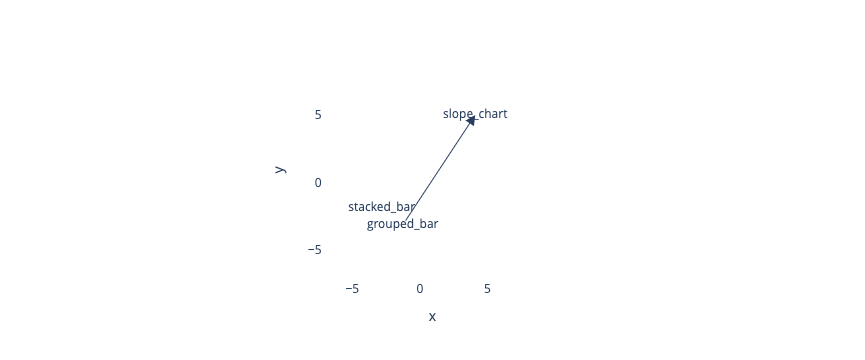

In [99]:
(px.scatter(
                emb_df,
                x="x",
                y="y",
                text=emb_df.index,
                range_x=[emb_min, emb_max],
                range_y=[emb_min, emb_max],
            )
            .update_layout(plot_bgcolor="white")
            .update_traces(mode="text", cliponaxis=False)
            .update_xaxes(scaleanchor="y", scaleratio=1, constrain="domain")
 .add_annotation(x=to.x, y=to.y, ax=frm.x, ay=frm.y, 
                 arrowhead=2, arrowsize=2, hovertext="yo",
                    axref="x", ayref="y", xref="x", yref="y",
                    xanchor="center", yanchor="middle")
)


In [18]:
order = list(df["from"].unique())

In [66]:
fig = go.FigureWidget(px.density_heatmap(df, x="from", y="to", z="cost", 
                   color_continuous_scale="reds", text_auto=True,
                   category_orders={"from":square.index, "to":square.index}))
fig

FigureWidget({
    'data': [{'coloraxis': 'coloraxis',
              'histfunc': 'sum',
              'hoverte…

In [41]:
def test(trace, points, state):
    with out:
        print("yooo")

fig.data[0].on_click(test)


In [38]:
import ipywidgets as widgets


In [39]:
out = widgets.Output(layout={'border': '1px solid black'})
out

Output(layout=Layout(border='1px solid black'))